In [1]:
from fastai.vision.all import *


In [2]:
path =  Path("/root/.fastai/data/oxford-iiit-pet")


In [3]:
# delete directory if it exists
if os.path.exists(path):
    shutil.rmtree(path)

path = untar_data(URLs.PETS)
print(path)



/root/.fastai/data/oxford-iiit-pet


In [4]:
additional_images = Path('./images')
print(additional_images.ls())

# Gather all image files recursively
all_images = get_image_files(additional_images)

# Verify images
failed = verify_images(all_images)
print(f"Failed images: {failed}")

# Unlink (delete) failed images
for img in failed:
    img.unlink()

[Path('images/Affenpinscher'), Path('images/Afghan Hound'), Path('images/Africanis'), Path('images/Airedale Terrier'), Path('images/Akbash'), Path('images/Akita'), Path('images/Aksaray Malaklisi'), Path('images/Alano Español'), Path('images/Alapaha Blue Blood Bulldog'), Path('images/Alaskan Husky'), Path('images/Alaskan Klee Kai'), Path('images/Alaskan Malamute'), Path('images/Alpine Dachsbracke'), Path('images/American Bulldog'), Path('images/American Bully'), Path('images/American Cocker Spaniel'), Path('images/American English Coonhound'), Path('images/American Foxhound'), Path('images/American Hairless Terrier'), Path('images/American Pit Bull Terrier'), Path('images/American Staffordshire Terrier'), Path('images/American Water Spaniel'), Path('images/Anglo-Français de Petite Vénerie'), Path('images/Appenzeller Sennenhund'), Path('images/Ariège Pointer'), Path('images/Ariégeois'), Path('images/Armenian Gampr'), Path('images/Artois Hound'), Path('images/Australian Cattle Dog'), Path

In [5]:
ims = get_image_files(additional_images)
# ims = [img for img in ims \
#     if img.parent.name[0].lower() == 'a' or \
#         img.parent.name == 'not-a-pet']

# Assuming ims is already defined
total_images = len(ims)
print(f"Total images: {total_images}")

# print(ims[:20])
for i, img in enumerate(ims):
    category = img.parent.name
    try:
        im = PILImage.create(img)
    except:
        print(f"Failed to open {img}")
        continue

    shutil.copy(src=img, dst=path/'images'/f"{category}_{i}.jpg")
    if (i + 1) % 100 == 0:
        # Use carriage return to overwrite the current line
        print(f"\rProcessed {i + 1} / {total_images} images", end='')
        sys.stdout.flush()
        
failed = verify_images(path/'images')
print(f"Failed images: {failed}")
failed.map(Path.unlink)


Total images: 10515
Processed 900 / 10515 images

/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Processed 10500 / 10515 images'PosixPath' object is not iterable
Failed images: []


(#0) []

In [6]:
import torch; print(torch.cuda.get_device_name(0))

# Flush CUDA memory
torch.cuda.empty_cache()

import gc
gc.collect()

NVIDIA GeForce RTX 4070 Ti


66

In [7]:
from PIL import Image
from fastai.vision.all import *
from sklearn.model_selection import train_test_split
import re

path =  Path("/root/.fastai/data/oxford-iiit-pet/images")
# print(path.ls())

all_images = get_image_files(path)

# Extract labels from file names
def get_label(file_path):
    file_name = file_path.name if isinstance(file_path, Path) else file_path
    match = re.match(r'(.+)_\d+\.jpg', file_name)
    if match:
        return [match.group(1)]
    else:
        raise ValueError(f"Filename {file_name} does not match the expected pattern")

# Create a list of labels
# print(all_images[:5])

# Create a list of labels for each image in all_images
labels = [get_label(img) for img in all_images]
print(labels[:5])

# Stratified split, create training and test sets based on the labels
train_idx, valid_idx = train_test_split(range(len(all_images)), test_size=0.2, stratify=labels, random_state=42)

dblock = DataBlock(
    blocks=(ImageBlock, MultiCategoryBlock),
    get_items=get_image_files,
    splitter=IndexSplitter(valid_idx),
    get_y=get_label,
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75)
)

dblock.summary(path)

dls = dblock.dataloaders(path, bs=256)
print(dls.vocab)



[['pomeranian'], ['wheaten_terrier'], ['Bichon Frisé'], ['Akita'], ['Egyptian_Mau']]
Setting-up type transforms pipelines
Found 17905 items
2 datasets of sizes 14324,3581
Setting up Pipeline: PILBase.create
Setting up Pipeline: get_label -> MultiCategorize -- {'vocab': None, 'sort': True, 'add_na': False} -> OneHotEncode -- {'c': None}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/pomeranian_73.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x333
  Pipeline: get_label -> MultiCategorize -- {'vocab': None, 'sort': True, 'add_na': False} -> OneHotEncode -- {'c': None}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/pomeranian_73.jpg
    applying get_label gives
      [pomeranian]
    applying MultiCategorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorMultiCategory([145])
    applying OneHotEncode -- {'c': None} gives
      TensorMultiCategory of size 154

F

/opt/miniconda3/envs/work/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Output shape: torch.Size([256, 512])


/opt/miniconda3/envs/work/lib/python3.11/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/opt/miniconda3/envs/work/lib/python3.11/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


/opt/miniconda3/envs/work/lib/python3.11/site-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **to

SuggestedLRs(slide=0.2089296132326126, valley=0.0014454397605732083)

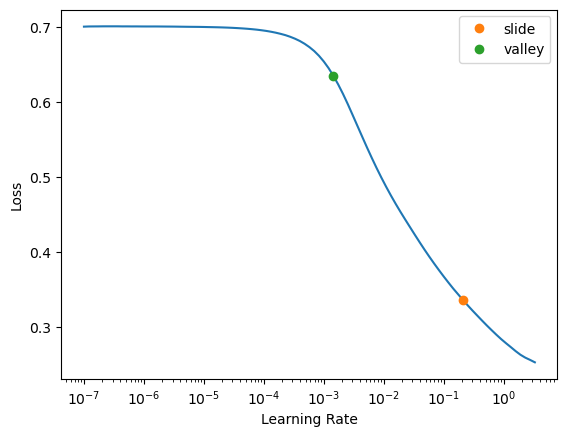

In [8]:
import torch.nn as nn
from torch.nn import BCEWithLogitsLoss
from fastai.vision.all import *
import timm

# Define the CustomHead class with shape inspection
class CustomHead(nn.Module):
    def __init__(self, nf, n_out):
        super().__init__()
        self.pool = nn.AdaptiveAvgPool2d(1)
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(nf, n_out)

    def forward(self, x):
        if x.dim() == 2:  # No spatial dimensions (1D features per image)
            # print("Input is 2D, skipping pooling.")
            x = self.flatten(x)
        elif x.dim() == 4:  # Regular case: [batch_size, channels, height, width]
            x = self.pool(x)
            # print(f"Shape after pooling: {x.shape}")
            x = self.flatten(x)
        else:
            raise ValueError(f"Unexpected input dimension: {x.dim()} dimensions.")
        # print(f"Shape after flattening: {x.shape}")
        x = self.linear(x)
        return x

# Create the model
model_name = 'resnet18'  # Replace with your model name
the_model = timm.create_model(model_name, pretrained=True, num_classes=0)  # num_classes=0 to exclude the final layer

# Move the model to the GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
the_model.to(device)

# Inspect the output shape
x, _ = dls.one_batch()
x = x.to(device)  # Move the input tensor to the same device as the model
with torch.no_grad():
    output = the_model(x)
print(f"Output shape: {output.shape}")

# Extract the number of features
nf = output.shape[1] if output.dim() == 4 else output.shape[-1]  # Handle cases where output is 1D or 4D

# Combine the backbone and custom head
model = nn.Sequential(
    the_model,
    CustomHead(nf=nf, n_out=len(dls.vocab))
)

# Create the learner
learn = Learner(
    dls,
    model,
    loss_func=BCEWithLogitsLoss(),
    metrics=accuracy_multi
).to_bf16()

learn.lr_find(suggest_funcs=(slide, valley))

In [9]:
learn.fine_tune(5, 1e-1)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.056297,0.040569,0.992660,00:33


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.034813,0.038724,0.993419,00:35
1,0.033608,0.039888,0.991660,00:34
2,0.031393,0.035666,0.993390,00:34
3,0.028699,0.028968,0.993751,00:34
4,0.026455,0.025985,0.993884,00:34


In [10]:
from fastai.vision.all import PILImage
from PIL import Image
import numpy as np

# Debug: Check if learn object is loaded
try:
    print(f"Model loaded: {learn}")
except NameError:
    print("Error: 'learn' object is not defined or not loaded.")

# Debug: Check if dls object is loaded
try:
    print(f"DataLoaders loaded: {dls}")
    print(f"Vocabulary: {dls.vocab}")
except NameError:
    print("Error: 'dls' object is not defined or not loaded.")
except AttributeError:
    print("Error: 'dls' object does not have the expected attributes.")


def perform_prediction(img_path):
    try:
        img = PILImage.create(img_path)
        img.show()
        # print("Image loaded successfully.")
        # print(f"Image shape: {img.shape}")
        # print(f"Image type: {type(img)}")
    except Exception as e:
        print(f"Error loading image: {e}")

    # Predict on a new image
    try:
        pred, pred_idx, probs = learn.predict(img)
        probs = sigmoid(probs)
        # print(f"Predicted labels: {pred}")
        # print(f"Prediction indices: {pred_idx}")
        # print(f"Probabilities: {probs}")
    except Exception as e:
        print(f"Error in prediction: {e}")

    # Predict on a new image
    try:
        not_a_pet_idx = list(dls.vocab).index('not-a-pet')
        # print(f"Index of 'not-a-pet' in vocabulary: {not_a_pet_idx}")
    except Exception as e:
        print(f"Error finding 'not-a-pet' in vocabulary: {e}")

    # Set a threshold
    threshold = 0.2
    is_not_pet = probs[not_a_pet_idx] > threshold 

    if is_not_pet:
        return "This is not a pet image."
    else:
        # Find the breed with the highest probability
        # breed_probs = torch.cat((probs[:not_a_pet_idx], probs[not_a_pet_idx+1:]))  # Exclude 'not_a_pet' from breed probabilities
        breed_idx = probs.argmax()
        breed_name = dls.vocab[breed_idx]
        return f"This is a pet image of breed: {breed_name}"

Model loaded: <fastai.learner.Learner object at 0x7f67b51b7ed0>
DataLoaders loaded: <fastai.data.core.DataLoaders object at 0x7f67be296410>
Vocabulary: ['Abyssinian', 'Affenpinscher', 'Afghan Hound', 'Africanis', 'Airedale Terrier', 'Akbash', 'Akita', 'Aksaray Malaklisi', 'Alano Español', 'Alapaha Blue Blood Bulldog', 'Alaskan Husky', 'Alaskan Klee Kai', 'Alaskan Malamute', 'Alpine Dachsbracke', 'American Bulldog', 'American Bully', 'American Cocker Spaniel', 'American English Coonhound', 'American Foxhound', 'American Hairless Terrier', 'American Pit Bull Terrier', 'American Staffordshire Terrier', 'American Water Spaniel', 'Anglo-Français de Petite Vénerie', 'Appenzeller Sennenhund', 'Ariège Pointer', 'Ariégeois', 'Armenian Gampr', 'Artois Hound', 'Australian Cattle Dog', 'Australian Silky Terrier', 'Australian Stumpy Tail Cattle Dog', 'Austrian Black Hound', 'Austrian Tan Hound', 'Azawakh', 'Bakharwal', 'Banjara Hound', 'Bankhar Dog', 'Barak hound', 'Barbado da Terceira', 'Barbet', 

This is a pet image of breed: American Foxhound


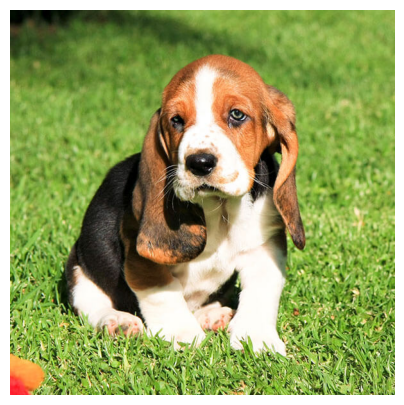

In [11]:
img_path = Path('images/Basset Hound/0c85043c-8c36-4ee6-983a-74fbb98a66ab.jpg')
print(perform_prediction(img_path))



This is not a pet image.


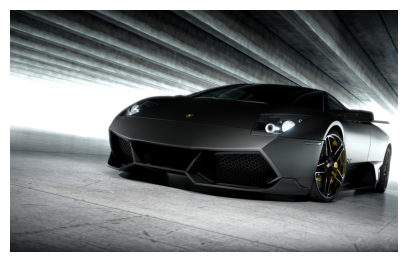

In [12]:
img_path = Path('images/not-a-pet/0a24876d-3891-46be-8240-87d543ae28a3.jpg')
print(perform_prediction(img_path))



/opt/miniconda3/envs/work/lib/python3.11/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/opt/miniconda3/envs/work/lib/python3.11/site-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


This is a pet image of breed: Akita


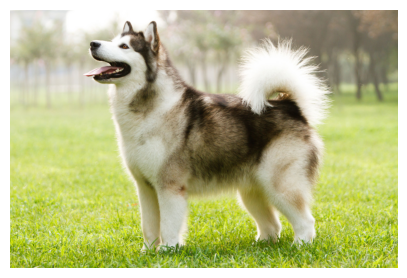

In [13]:
img_path = Path('images/Alaskan Malamute/1fa5011d-5320-4f38-8af1-ede79311f922.jpg')
print(perform_prediction(img_path))

In [14]:
from fastai.vision.all import PILImage
from PIL import Image
import numpy as np

# Debug: Check if learn object is loaded
try:
    print(f"Model loaded: {learn}")
except NameError:
    print("Error: 'learn' object is not defined or not loaded.")

# Debug: Check if dls object is loaded
try:
    print(f"DataLoaders loaded: {dls}")
    print(f"Vocabulary: {dls.vocab}")
except NameError:
    print("Error: 'dls' object is not defined or not loaded.")
except AttributeError:
    print("Error: 'dls' object does not have the expected attributes.")


def perform_prediction(img_path):
    try:
        img = PILImage.create(img_path)
        img.show()
        # print("Image loaded successfully.")
        # print(f"Image shape: {img.shape}")
        # print(f"Image type: {type(img)}")
    except Exception as e:
        print(f"Error loading image: {e}")

    # Predict on a new image
    try:
        pred, pred_idx, probs = learn.predict(img)
        probs = sigmoid(probs)
        # print(f"Predicted labels: {pred}")
        # print(f"Prediction indices: {pred_idx}")
        # print(f"Probabilities: {probs}")
    except Exception as e:
        print(f"Error in prediction: {e}")

    # Predict on a new image
    try:
        not_a_pet_idx = list(dls.vocab).index('not-a-pet')
        # print(f"Index of 'not-a-pet' in vocabulary: {not_a_pet_idx}")
    except Exception as e:
        print(f"Error finding 'not-a-pet' in vocabulary: {e}")

    # Set a threshold
    threshold = 0.2
    is_not_pet = probs[not_a_pet_idx] > threshold 

    if is_not_pet:
        return "This is not a pet image."
    else:
        # Get the top 5 predictions
        top5_idx = probs.argsort(descending=True)[:5]
        top5_probs = probs[top5_idx]
        top5_breeds = [dls.vocab[i] for i in top5_idx]

        # Format the output
        result = "Top 5 predictions:\n"
        for breed, prob in zip(top5_breeds, top5_probs):
            result += f"{breed}: {prob:.4f}\n"
        
        return result

Model loaded: <fastai.learner.Learner object at 0x7f67b51b7ed0>
DataLoaders loaded: <fastai.data.core.DataLoaders object at 0x7f67be296410>
Vocabulary: ['Abyssinian', 'Affenpinscher', 'Afghan Hound', 'Africanis', 'Airedale Terrier', 'Akbash', 'Akita', 'Aksaray Malaklisi', 'Alano Español', 'Alapaha Blue Blood Bulldog', 'Alaskan Husky', 'Alaskan Klee Kai', 'Alaskan Malamute', 'Alpine Dachsbracke', 'American Bulldog', 'American Bully', 'American Cocker Spaniel', 'American English Coonhound', 'American Foxhound', 'American Hairless Terrier', 'American Pit Bull Terrier', 'American Staffordshire Terrier', 'American Water Spaniel', 'Anglo-Français de Petite Vénerie', 'Appenzeller Sennenhund', 'Ariège Pointer', 'Ariégeois', 'Armenian Gampr', 'Artois Hound', 'Australian Cattle Dog', 'Australian Silky Terrier', 'Australian Stumpy Tail Cattle Dog', 'Austrian Black Hound', 'Austrian Tan Hound', 'Azawakh', 'Bakharwal', 'Banjara Hound', 'Bankhar Dog', 'Barak hound', 'Barbado da Terceira', 'Barbet', 

Top 5 predictions:
American Foxhound: 0.2309
saint_bernard: 0.1824
Beagle: 0.1689
Artois Hound: 0.1603
Basset Hound: 0.1582



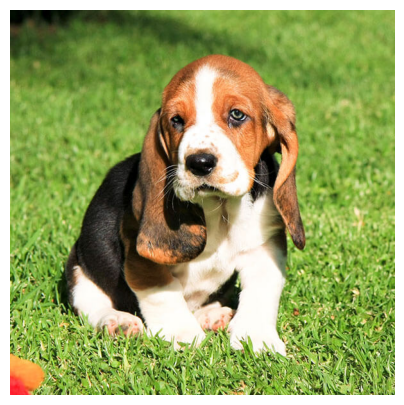

In [15]:
img_path = Path('images/Basset Hound/0c85043c-8c36-4ee6-983a-74fbb98a66ab.jpg')
print(perform_prediction(img_path))



This is not a pet image.


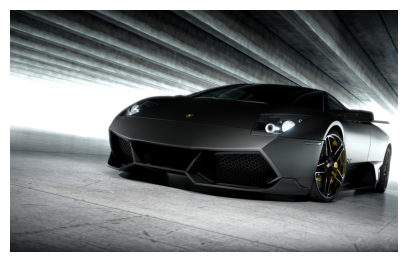

In [16]:
img_path = Path('images/not-a-pet/0a24876d-3891-46be-8240-87d543ae28a3.jpg')
print(perform_prediction(img_path))


Top 5 predictions:
Akita: 0.1667
Alaskan Malamute: 0.0716
Afghan Hound: 0.0518
Campeiro Bulldog: 0.0511
Alaskan Husky: 0.0447



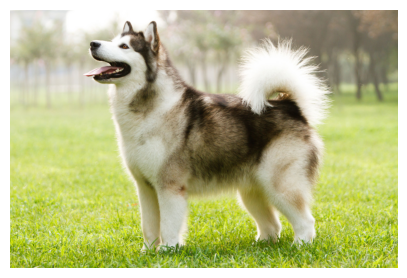

In [17]:
img_path = Path('images/Alaskan Malamute/1fa5011d-5320-4f38-8af1-ede79311f922.jpg')
print(perform_prediction(img_path))